Data ko compress karti hai bina zyada important information lose kiye.
Tumhare paas bohat saare features (columns) hain.

Sab features zaruri nahi hote — kuch duplicate ya kam useful hote hain.

PCA un features ko smartly combine karta hai
➔ aur naye features banata hai jo data ko best represent karte hain.
Jab features bohat zyada hon (100, 500, 1000+).

Jab data me redundancy (duplicate information) ho.

Jab model ko fast aur accurate banana ho.



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

In [2]:
from sklearn.datasets import load_breast_cancer

In [3]:
cancer=load_breast_cancer()

In [4]:
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [5]:
dir(cancer)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [6]:
print(cancer['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is Worst Radius.

    - 

Principle component analysis analyize the dataset and combine the features that are closely variate with each other

In [7]:
df=pd.DataFrame(cancer['data'],columns=cancer['feature_names'])
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [8]:
cancer['target_names']

array(['malignant', 'benign'], dtype='<U9')

Scale the data by using scaler 

Scale the columns so the machine learning algorithm cannot be confused 

In [9]:
from sklearn.preprocessing import StandardScaler


In [10]:
scale=StandardScaler()

In [11]:
scale.fit(df)

StandardScaler()

Transformation

In [20]:
scale_data=scale.transform(df)

c:\Users\R.C\.conda\envs\Machine_Learning\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


# PCA

In [21]:
from sklearn.decomposition import PCA

Specify the number of component you want to keep

In [23]:
pca=PCA(n_components=2)

In [24]:
pca.fit(scale_data)

PCA(n_components=2)

Transform 

In [27]:
x_pca=pca.transform(scale_data)

Chk out the scale data shape

In [29]:
scale_data.shape

(569, 30)

Chk out the xpca shape after the transformation

In [30]:
x_pca.shape

(569, 2)

Text(0, 0.5, 'second principle component')

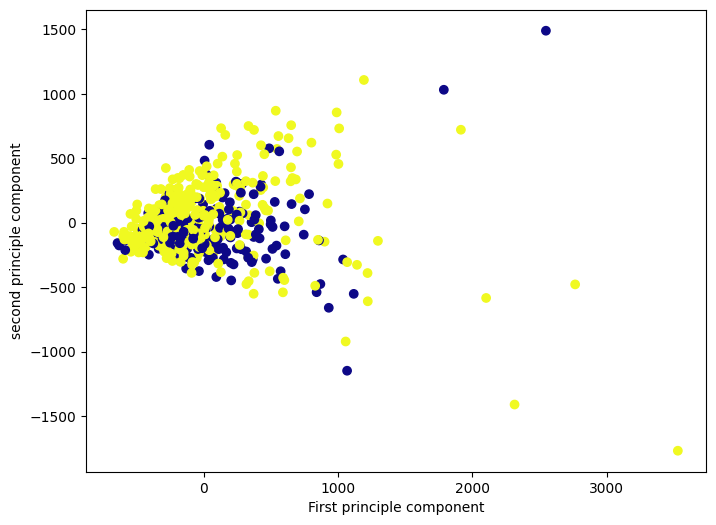

In [34]:
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,1],c=cancer['target'],cmap='plasma')
plt.xlabel('First principle component')
plt.ylabel('second principle component')

In [35]:
pca.components_

array([[-6.21396652e-05,  2.50315219e-05, -5.48926676e-06,
        -3.82137773e-07,  6.30885565e-02,  2.04718558e-02,
         1.16958248e-02,  1.44012173e-02,  3.02102691e-02,
         2.21562159e-01,  2.09932182e-03,  1.48852619e-03,
         3.02179527e-04,  7.16845745e-06,  5.32425424e-01,
         9.38036409e-02,  4.94204496e-02,  2.27929465e-01,
         1.27541127e-01,  7.59964575e-01, -4.38410753e-05,
        -8.70912942e-06, -3.91949008e-06, -2.62965974e-07,
         2.87312414e-02,  4.40400999e-03,  3.22291571e-03,
         5.81908071e-03,  3.22780544e-03,  6.21671865e-02],
       [-2.29332175e-04, -4.05896926e-05, -3.50220015e-05,
        -1.87247614e-06,  2.04339458e-02, -2.20265612e-02,
        -1.40356210e-02, -2.10860537e-02, -1.33496718e-02,
        -8.51103116e-02, -4.63752399e-04,  1.25982324e-03,
        -1.20913073e-04, -3.56992248e-06,  8.32414533e-01,
        -6.77168777e-02, -4.13918887e-02, -1.20725645e-01,
         6.13928774e-02, -5.15322488e-01, -1.78572984e-

In [39]:
df_comp=pd.DataFrame(pca.components_,columns=cancer['feature_names'])

In [40]:
df_comp.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,-0.000062,0.000025,-0.000005,-3.821378e-07,0.063089,0.020472,0.011696,0.014401,0.03021,0.221562,...,-0.000044,-0.000009,-0.000004,-2.629660e-07,0.028731,0.004404,0.003223,0.005819,0.003228,0.062167
1,-0.000229,-0.000041,-0.000035,-1.872476e-06,0.020434,-0.022027,-0.014036,-0.021086,-0.01335,-0.085110,...,-0.000179,-0.000052,-0.000028,-1.257266e-06,0.024240,-0.009689,-0.007252,-0.018436,-0.012975,-0.081704


0 is the first principle component 

1 is the second principle component

<Axes: >

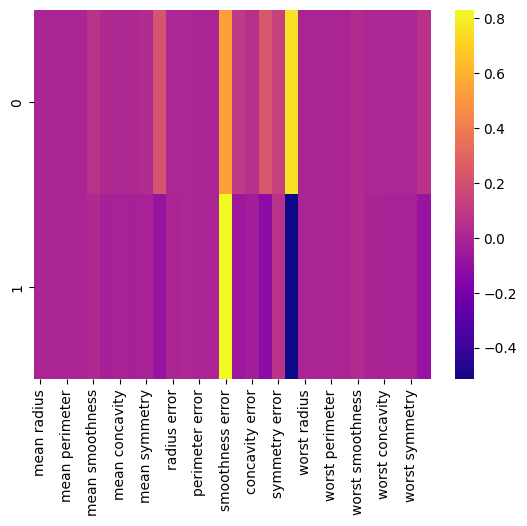

In [41]:
sns.heatmap(df_comp,cmap='plasma')